# Week 2
-------------------------------------
Lab exercise kali ini menggunakan dataset heart failure:
https://raw.githubusercontent.com/michellechandraa/DataMining/main/heart_failure_clinical_records.csv


## Import library

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [22]:
# Read CSV
url = "https://raw.githubusercontent.com/michellechandraa/DataMining/main/heart_failure_clinical_records.csv"
df = pd.read_csv(url)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Arti dari Variabel

Anemia - anemia is a condition in which you lack enough healthy red blood cells to carry adequate oxygen to your body's tissues. Having anemia, also referred to as low hemoglobin, can make you feel tired and weak. (there is not anemia - 0, there is anemia - 1)

Creatine_phosphokinase (CPK) - CPK is an enzyme in the body. It is found mainly in the heart, brain, and skeletal muscle. Total CPK normal values: 10 to 120 micrograms per liter (mcg/L)

Ejection_fraction (EF) - EF is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat. This indication of how well your heart is pumping out blood can help to diagnose and track heart failure. A normal heart’s ejection fraction may be between 50 and 70 percent.

Platelets - platelets are colorless blood cells that help blood clot. Platelets stop bleeding by clumping and forming plugs in blood vessel injuries. Thrombocytopenia might occur as a result of a bone marrow disorder such as leukemia or an immune system problem. The normal number of platelets in the blood is 150,000 to 400,000 platelets per microliter (mcL) or 150 to 400 × 109/L.

Serum_creatinine - The amount of creatinine in your blood should be relatively stable. An increased level of creatinine may be a sign of poor kidney function. Serum creatinine is reported as milligrams of creatinine to a deciliter of blood (mg/dL) or micromoles of creatinine to a liter of blood (micromoles/L). Here are the normal values by age: 0.9 to 1.3 mg/dL for adult males. 0.6 to 1.1 mg/dL for adult females. 0.5 to 1.0 mg/dL for children ages 3 to 18 years.

Serum_sodium - Measurement of serum sodium is routine in assessing electrolyte, acid-base, and water balance, as well as renal function. Sodium accounts for approximately 95% of the osmotically active substances in the extracellular compartment, provided that the patient is not in renal failure or does not have severe hyperglycemia. The normal range for blood sodium levels is 135 to 145 milliequivalents per liter (mEq/L).

Time - follow-up period (days)

High_blood_pressure - (True - 1, False - 0)

Age - between 40 - 95

Diabetes - (True - 1, False - 0)

Sex - (male - 1, female - 0)

Smoking - (True - 1, False - 0)

Death event - (True - 1, False - 0

## Data Preprocessing

Periksa apakah ada baris yang duplikat <br> Hint: gunakan function bawaan .duplicated



In [23]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Length: 299, dtype: bool

Periksa apakah ada missing values

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Pisahkan dataset menjadi variabel independen dan variabel dependen

In [25]:
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
print('Train set:', X_train.shape, Y_train.shape)
print('Train set:', X_test.shape, Y_test.shape)

Train set: (269, 12) (269,)
Train set: (30, 12) (30,)


Lakukan fitur scaling pada variabel X_train dan X_test.

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 1. Logistic Regression

Bangun model dan ukur accuracy nya. Pasang random state = 0

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_scaled, Y_train)

# accuracy = accuracy_score(Y_test, y_pred)
# print(accuracy)

LogisticRegression()

Uji model dengan dataset test

In [29]:
# Melakukan prediksi pada data pengujian yang telah di-scale
y_pred = logistic_regression_model.predict(X_test_scaled)
print(y_pred)

[0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


Cetak confusion matrix dan akurasi modelnya

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix: \n", cm)
print("Accuracy: ", accuracy_score(Y_test, y_pred))

Confusion Matrix: 
 [[19  1]
 [ 4  6]]
Accuracy:  0.8333333333333334


Coba prediksi data pasien dengan profil sebagai berikut, gunakan list pada bagian bawah soal untuk membantu:

* usia: 58 tahun
* memiliki anemia
* kadar creatinine phosphokinase: 60
* tidak menderita diabetes
* ejection fraction: 38
* tidak memiliki tekanan darah tinggi
* trombosit: 153000
* kadar serum creatinine: 5.8
* kadar serum sodium:134
* jenis kelamin laki-laki
* tidak merokok
* follow-up period time: 26 hari


    [58,1,60,0,38,0,153000,5.8,134,1,0,26]

In [32]:
# predict 
print(logistic_regression_model.predict([[58,1,60,0,38,0,153000,5.8,134,1,0,26]]))

[0]


# 2. Linear Regression
dataset: https://raw.githubusercontent.com/michellechandraa/DataMining/main/real_estate.csv

## Import Library
1. Import dataset di atas dengan menggunakan library pandas kemudian tampilkan 10 data pertama

In [40]:
url = "https://raw.githubusercontent.com/michellechandraa/DataMining/main/real_estate.csv"
df2 = pd.read_csv(url)
df2.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


2. Hapus kolom 'No' dan ubahlah nama kolom dalam dataframe menjadi 'transaction date', 'house age', 'distance to the nearest MRT station', 'number of convinience stores', 'latitude', 'longitude', 'house price of unit area'

In [41]:
df2.drop(columns=['No'], inplace=True)

df2.columns = ['transaction date', 'house age', 'distance to the nearest MRT station', 
               'number of convenience stores', 'latitude', 'longitude', 
               'house price of unit area']
df2.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Pisahkanlah dataframe menjadi variabel X dan Y dimana variabel Y berisi data dari kolom 'house price of unit area' sementara variabel x berisi data dari kolom 'transaction date', 'house age', 'distance to the nearest MRT station', 'number of convinience stores', 'latitude', 'longitude'

In [42]:
X = df2[['transaction date', 'house age', 'distance to the nearest MRT station',
         'number of convenience stores', 'latitude', 'longitude']]

# X = df2.drop("house price of unit area", axis=1)
Y = df2['house price of unit area']

In [44]:
# print(X.head())
# print(Y.head())
print(df2.head())

   transaction date  house age  distance to the nearest MRT station  \
0          2012.917       32.0                             84.87882   
1          2012.917       19.5                            306.59470   
2          2013.583       13.3                            561.98450   
3          2013.500       13.3                            561.98450   
4          2012.833        5.0                            390.56840   

   number of convenience stores  latitude  longitude  house price of unit area  
0                            10  24.98298  121.54024                      37.9  
1                             9  24.98034  121.53951                      42.2  
2                             5  24.98746  121.54391                      47.3  
3                             5  24.98746  121.54391                      54.8  
4                             5  24.97937  121.54245                      43.1  


Buatlah model linear regression nya, kemudian tunjukan intercept beserta coefficient dari setiap variabel independen (X) nya. (Library bebas)

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, Y)
print(f"Coefficient transaction date: {model.coef_}")
print(f"intercept: {model.intercept_}")

Coefficient transaction date: [ 5.14622746e+00 -2.69695448e-01 -4.48746107e-03  1.13327690e+00
  2.25472976e+02 -1.24236012e+01]
intercept: -14437.100802280556


Prediksilah nilai 'house price of unit area' dengan menggunakan model linear regression jika 'transaction date' = 2012.917, 'house age' = 5, 'distance to the nearest MRT station' = 220, 'number of convinience stores' = 8, 'latitude' = 24.98298, dan 'longitude' = 121.54024

In [54]:
results = model.predict([[2012.917, 5, 220, 8, 24.98298, 121.54024]])
print(f"Predicted house price of unit area: {results}")

Predicted house price of unit area: [51.57781114]


C:\Users\patri\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 3. Linear Regression

You will be using **mtcars** dataset which contains 12 columns and you need to predict the 'mpg' of a car based on the other attributes

load the dataset **mtcars** and clean up the dataframe by replacing the column name of the car's model

In [59]:
url = "mtcars.csv"
df3 = pd.read_csv(url)
df3.rename(columns={'model': 'car model'}, inplace=True)
df3.head()

,car model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [60]:
X = df3.drop("mpg", axis=1)
Y = df3["mpg"]

--- 
split the dataset into train and test dataset with 20% test size

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

Remember, SKLearn require the input to be in the form of array. Check your train and test's X and Y for their shape

In [62]:
print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

Train set: (25, 11) (25,)
Test set: (7, 11) (7,)


---
- Pick one variable to use as a predictor for simple linear regression. Create a markdown cell below and discuss your reasons. 
 - Justify your choice with some visualizations.
 - Is there a second variable you'd like to use? For example, we're not doing multiple linear regression here, but if we were, is there another variable you'd like to include if we were using two predictors?

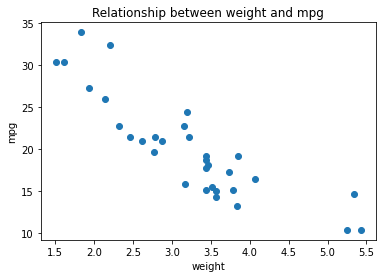

In [63]:
# Variable = weight
# This is because the weight will effect mpg. The heavier the weight, the more mpg is wasted.
import matplotlib.pyplot as plt
plt.scatter(df3['wt'], df3['mpg'])
plt.xlabel('weight')
plt.ylabel('mpg')
plt.title('Relationship between weight and mpg')
plt.show()

---
 - Use sklearn to fit the training data using simple linear regression.
 - Use the model to make mpg predictions on the test set.
 - Plot the data and the prediction.
 - Print out the mean squared error for the training set and the test set and compare.

In [64]:
X = df3[['wt']] 
y = df3['mpg']           

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

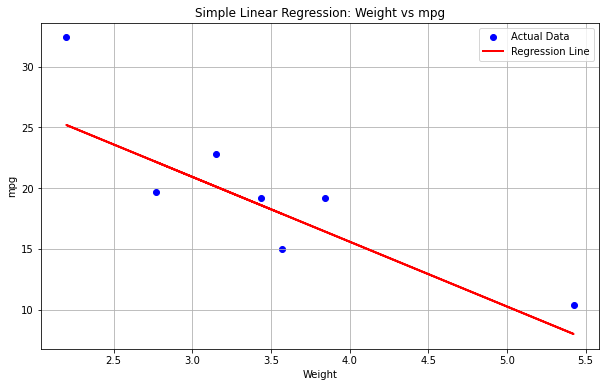

In [65]:
# Plot the data and the prediction

X_test_flat = X_test.values.flatten()
y_test_flat = y_test.values.flatten()

plt.figure(figsize=(10, 6))
plt.scatter(X_test_flat, y_test_flat, label='Actual Data', color='blue')
plt.plot(X_test_flat, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Weight')
plt.ylabel('mpg')
plt.title('Simple Linear Regression: Weight vs mpg')
plt.legend()
plt.grid(True)
plt.show()


# 4. Clustering

Dataset:
https://raw.githubusercontent.com/michellechandraa/DataMining/main/Customers.csv

## Load Dataset

In [68]:
url = "https://raw.githubusercontent.com/michellechandraa/DataMining/main/Customers.csv"
df4 = pd.read_csv(url)
df4.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Data Preprocessing

In [69]:
df4.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

For this case study, we only use income and spending score

In [70]:
# create new dataframe that consist only annual income and spending score
new_df4 = pd.DataFrame(df4[['Annual Income ($)', 'Spending Score (1-100)']])
new_df4.head()

,Annual Income ($),Spending Score (1-100)
0,15000,39
1,35000,81
2,86000,6
3,59000,77
4,38000,40


Before we analyze our data, we need to scale the data with standardization method

In [71]:
#scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_df = pd.DataFrame(scale.fit_transform(new_df4), columns = ['income', 'spending'])

scaled_df.head()

,income,spending
0,-2.093501,-0.428339
1,-1.656133,1.075546
2,-0.540845,-1.609962
3,-1.131292,0.932319
4,-1.590528,-0.392532


get stastical information on the new dataset

In [72]:
scaled_df.describe()

,income,spending
count,2.000000e+03,2.000000e+03
mean,-4.943294e-16,2.584044e-17
std,1.000250e+00,1.000250e+00
min,-2.421527e+00,-1.824803e+00
25%,-7.907571e-01,-8.222131e-01
50%,-1.501968e-02,-3.446402e-02
75%,8.388918e-01,8.607053e-01
max,1.732899e+00,1.755875e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

Text(0, 0.5, 'Spending Score(1-100)')

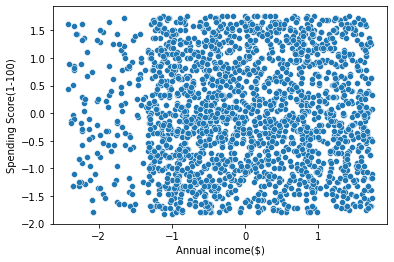

In [73]:
# Visualize the position
sns.scatterplot(data = scaled_df, x = 'income', y="spending")
plt.xlabel('Annual income($)')
plt.ylabel('Spending Score(1-100)')

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [74]:
# assign cluster with K-Means algorithm

from sklearn.cluster import KMeans

kmeans = KMeans(init="random", n_clusters=5, max_iter=300, random_state=42)
kmeans.fit_predict(scaled_df)

array([2, 3, 2, ..., 2, 1, 0])

Visualize your result based on income and spending. You also can show the final position of the centroid.

Text(0, 0.5, 'Spending Score (1-100)')

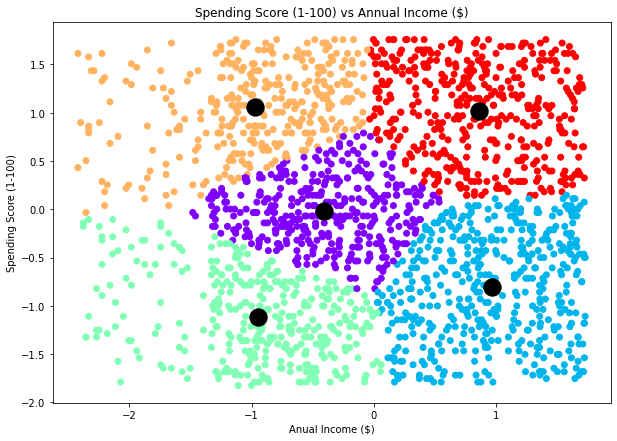

In [75]:
# visualize the result using scater chart
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.title("Spending Score (1-100) vs Annual Income ($)")
plt.scatter(scaled_df.iloc[:,0], scaled_df.iloc[:,1], c=kmeans.labels_, 
            cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black')
plt.xlabel("Anual Income ($)")
plt.ylabel("Spending Score (1-100)")

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method and silhouette score

1. using elbow method

Gunakan range elbow range(1, 11)

In [76]:
from sklearn.cluster import KMeans

# set the parameter for evaluating K
kmeans_params = {"init": "random","max_iter": 300, "random_state": 42,}

# check the inertia for each K
SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(scaled_df)
    SSE.append(kmeans.inertia_)

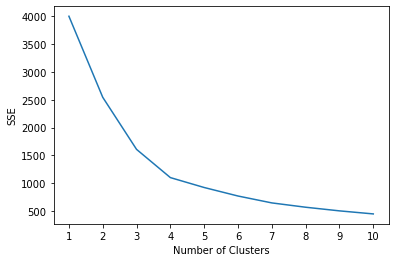

In [79]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [80]:
# using kneelocator to find the elbow/knee

from kneed import KneeLocator
findknee = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
print('the best k for your model is ', findknee.elbow)

the best k for your model is  4


2. using silhouette score

Gunakan range silhouette range(2, 11)

In [81]:
from sklearn.metrics import silhouette_score
silhouette_coef = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_coef.append(score)

Text(0, 0.5, 'Silhouette Coefficient')

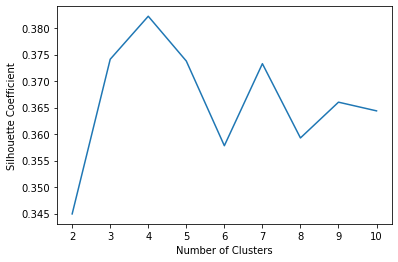

In [82]:
# manually visualize the score
plt.plot(range(2, 11), silhouette_coef)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")

# 5. K-Means Clustering
Perform clustering (K means clustering) for the airlines data to obtain optimum number of clusters.

use the dataset from east west airline, you can get the data from e-learn.

What you need to do:
 - Prepare the dataset
 - Check whether you need to clean the data or not
 - Normalize the values if you need to
 - Find the best K with elbow method
 - Plot the clustering result

In [83]:
url = "EastWestAirlines.csv"
df5 = pd.read_csv(url)
df5.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [84]:
df5.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [96]:
from sklearn import preprocessing
normalized = preprocessing.normalize(df5)
print(normalized)

[[3.44815547e-05 9.70414393e-01 0.00000000e+00 ... 0.00000000e+00
  2.41370883e-01 0.00000000e+00]
 [9.77144636e-05 9.40208568e-01 0.00000000e+00 ... 0.00000000e+00
  3.40437191e-01 0.00000000e+00]
 [7.11742344e-05 9.81113097e-01 0.00000000e+00 ... 0.00000000e+00
  1.66879855e-01 0.00000000e+00]
 ...
 [5.15333231e-02 9.43691958e-01 0.00000000e+00 ... 0.00000000e+00
  1.79770388e-02 1.28224243e-05]
 [7.30001869e-02 9.96924692e-01 0.00000000e+00 ... 1.81592505e-05
  2.54411099e-02 0.00000000e+00]
 [7.70720943e-01 5.78088626e-01 0.00000000e+00 ... 0.00000000e+00
  2.67960179e-01 0.00000000e+00]]


In [85]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df5)

In [86]:
from sklearn.cluster import KMeans

kmeans_params = {"init": "random", "n_init": 10,"max_iter": 300,
                 "random_state": 42}

# check the inertia for each K
ADD = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(scaled_df)
    ADD.append(kmeans.inertia_)

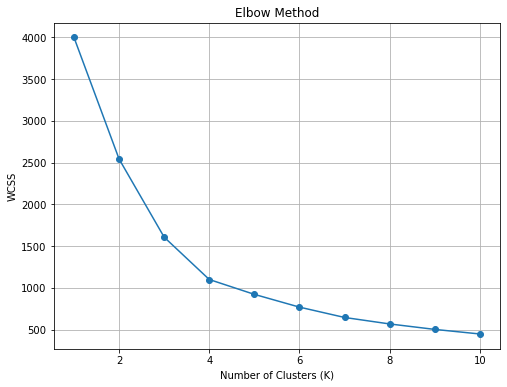

In [87]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), ADD, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()